## House Price Prediction with Linear Regression

### Description of the feilds of the dataset
The data has the information about the Houses in Lavasa with the features of each House and also its Rent depending on the features.<br>

1. Building Type:<br>
    Semi Furnished Single Room <br>
    Semi Furnished Flat <br>
    Fully Furnished Single Room<br>
    Minimum Budget Rooms<br>
    Semi Furnished Villa<br>
    Fully Furnished Flat <br>
    Super Furnished Single Room <br>
    Super Furnished Villa<br>
    Fully Furnished Villa<br>
    Super Furnished Flat

<br>  
2. Location:<br>
    Portofino <br>
    Clubview Road <br>
    School Street<br>
    Starter Homes <br>
<br>
3. Size:<br>
    2 BHK <br>
    3 BHK<br>
    4 BHK<br>
    1 BHK<br>
    5 BHK<br>
    6 BHK<br>
    8 BHK<br>    
    7 BHK<br>     
    9 BHK<br>     
    1 RK<br>
<br>
4. AreaSqFt: Area of the house (SqFt units).<br>
5. NoOfBath: Number of bathrooms in the house.<br>
6. NoOfPeople: Number of People that would stay in the house.<br>
7. NoOfBalcony: Number of balconies in the house. <br>
8. RentPerMonth: Rent of the house per month.<br>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns

In [2]:
df=pd.read_csv("E:/A/P/CHRIST/SEM 2/ML/LAB/HousePrices - Lab3.csv")

In [3]:
df.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0


### Exploratory Data Analysis

In [4]:
df.shape

(1000, 8)

**Replacing all the sub Location in Potofino as "Portofino".**

In [5]:
df["Location"].replace(dict.fromkeys(["Portofino D","Portofino C","Portofino A","Portofino H","Portofino E",
                                      "Portofino G","Portofino F","Portofino B"],"Portofino"), inplace=True)

**Datatypes of each of the variables**

In [6]:
df.dtypes

BuildingType     object
Location         object
Size             object
AreaSqFt        float64
NoOfBath          int64
NoOfPeople        int64
NoOfBalcony       int64
RentPerMonth    float64
dtype: object

**Checking of missing values**

In [7]:
df.isnull().sum()

BuildingType    0
Location        0
Size            0
AreaSqFt        0
NoOfBath        0
NoOfPeople      0
NoOfBalcony     0
RentPerMonth    0
dtype: int64

**Inference:** No missing values present.

**Description of the dataset**

In [8]:
df.describe()

,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1548.270010,2.661000,2.168000,1.544000,10476.633500
std,1345.141175,1.247251,0.959529,0.838312,10509.508971
min,375.000000,1.000000,1.000000,0.000000,1100.000000
25%,1090.000000,2.000000,2.000000,1.000000,4890.500000
50%,1270.000000,2.000000,2.000000,2.000000,7000.000000
75%,1664.250000,3.000000,2.000000,2.000000,11925.000000
max,35000.000000,11.000000,6.000000,3.000000,96000.000000


#### HeatMap

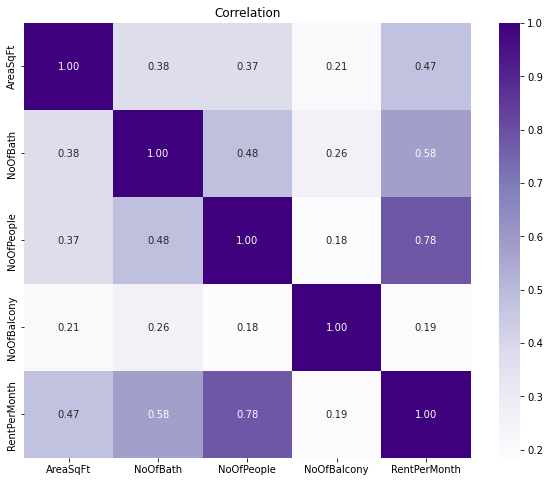

In [9]:
plt.figure(figsize=(10,8))
col=df.corr()
sns.heatmap(col,annot=True,fmt='.2f',cmap="Purples");
plt.title("Correlation")
plt.show()

**Inference:** There is no significantly strong correlation between the variables, except for a few ones. <br>
There is an positive correkation between RentPerMonth and NoOfPeople(+0.78), RentPerMonth and NoOfBath(+0.58), NoOfPeople and NoOfBath(+0.48), RentPerMonth and AreaSqFt(0.47) <br>
No negative correlation between any variables.

#### BoxPlot

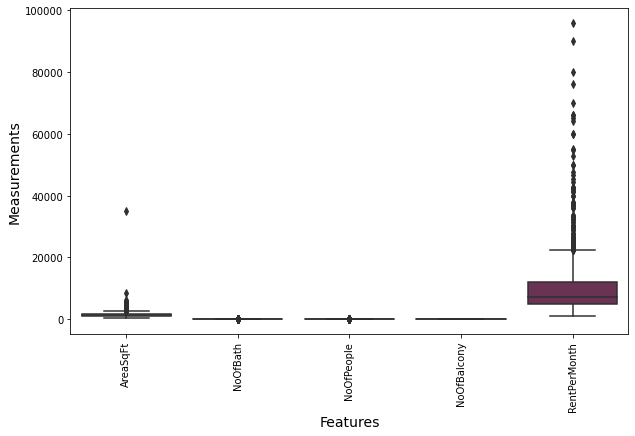

In [10]:
numeric_cols= ["AreaSqFt","NoOfBath","NoOfPeople","NoOfBalcony","RentPerMonth" ]
data=pd.melt(df[numeric_cols])

plt.figure(figsize=(10,6))

boxplot1=sns.boxplot(x="variable", y="value", data=data, palette="gist_stern_r")
boxplot1.set_xlabel("Features", fontsize=14)
boxplot1.set_ylabel("Measurements", fontsize=14)
plt.xticks(rotation=90)
plt.show()

### Scatter Plot

<AxesSubplot:xlabel='AreaSqFt', ylabel='RentPerMonth'>

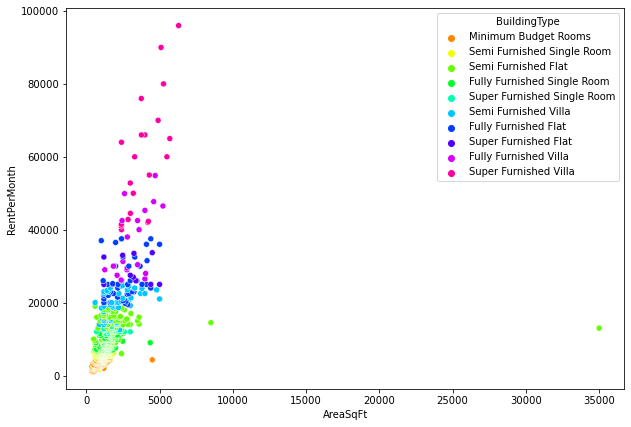

In [11]:
fig = plt.figure(figsize = (10, 7))
sns.scatterplot(data=df, x="AreaSqFt",y="RentPerMonth", hue="BuildingType", palette="hsv")

**Inference:** We can spot a few outliers from the scatter plot 

### Density Plot to detect outliers

<AxesSubplot:xlabel='AreaSqFt', ylabel='Density'>

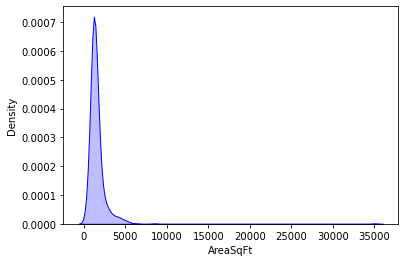

In [12]:
sns.kdeplot(data=df, x="AreaSqFt", color='b', shade=True)

<AxesSubplot:xlabel='RentPerMonth', ylabel='Density'>

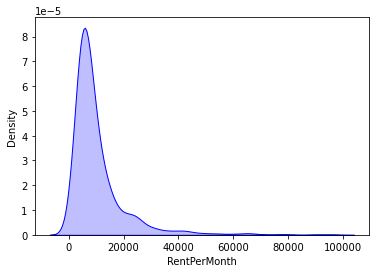

In [13]:
sns.kdeplot(data=df, x="RentPerMonth", color='b', shade=True)

In [14]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [15]:
sample_outliers = detect_outliers_iqr(df['AreaSqFt'])
print("Outliers from IQR method for AreaSqFt : ", len(sample_outliers))

sample_outliers = detect_outliers_iqr(df['RentPerMonth'])
print("Outliers from IQR method for RentPerMonth : ", len(sample_outliers))

Outliers from IQR method for AreaSqFt :  85
Outliers from IQR method for RentPerMonth :  182


### Treating ouliers by applying Log funtion

In [16]:
df["log_AreaSqFt"] = df["AreaSqFt"].map(lambda i: np.log(i) if i > 0 else 0) 
df.drop(['AreaSqFt'],axis=1, inplace=True)

df["log_RentPerMonth"] = df["RentPerMonth"].map(lambda i: np.log(i) if i > 0 else 0) 
df.drop(['RentPerMonth'],axis=1, inplace=True)

<AxesSubplot:xlabel='log_AreaSqFt', ylabel='Density'>

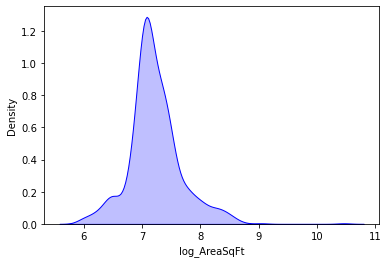

In [17]:
sns.kdeplot(data=df, x="log_AreaSqFt", color='b', shade=True)

<AxesSubplot:xlabel='log_RentPerMonth', ylabel='Density'>

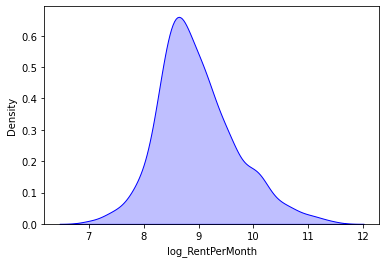

In [18]:
sns.kdeplot(data=df, x="log_RentPerMonth", color='b', shade=True)

**Inference:** After applying logarthmic funtion the variables with i=outliers have become skewwed and we can also see no outliers.

**Scatter Plot after drooping the outliers**

<AxesSubplot:xlabel='log_AreaSqFt', ylabel='log_RentPerMonth'>

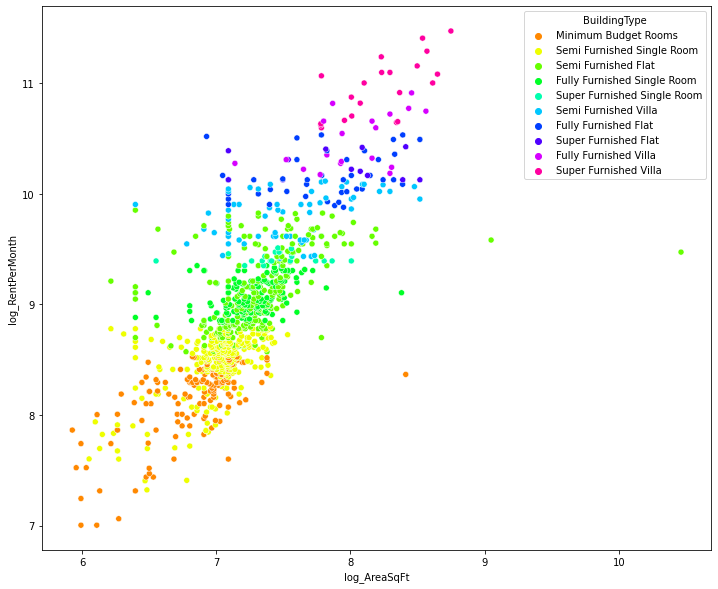

In [19]:
fig = plt.figure(figsize = (12, 10))
sns.scatterplot(data=df, x="log_AreaSqFt",y="log_RentPerMonth", 
                hue="BuildingType",
                palette="hsv")

**Inference:** After traying the outliers we can see an significant difference in the scatter plot , here we see that there is an positive linear relationship between the 2 varibales "AreaSqFt" and "RentPerMonth".

#### Histogram

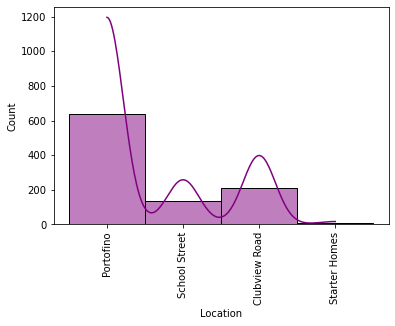

In [20]:
sns.histplot(data=df, x="Location", kde=True, color="purple")
plt.xticks(rotation=90)
plt.show()

**Inference:** The above diagram shows us the histogram of the Variable "Location".<br> 
We cannot spot any distinct symmetry or shape of the distribution of the variable.

### Label Encoding
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [21]:
categorical_columns=['BuildingType', 'Location', 'Size']

In [22]:
for i in categorical_columns:
    value_count=df[i].value_counts()
    print("\n",value_count)


 Semi Furnished Single Room     274
Semi Furnished Flat            246
Fully Furnished Single Room    153
Minimum Budget Rooms           146
Semi Furnished Villa            63
Fully Furnished Flat            41
Super Furnished Single Room     25
Super Furnished Villa           21
Fully Furnished Villa           19
Super Furnished Flat            12
Name: BuildingType, dtype: int64

 Portofino        640
Clubview Road    213
School Street    138
Starter Homes      9
Name: Location, dtype: int64

 2 BHK    429
3 BHK    353
4 BHK    103
1 BHK     51
5 BHK     22
6 BHK     21
8 BHK      8
7 BHK      7
9 BHK      4
1 RK       2
Name: Size, dtype: int64


In [23]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['Size']= label_encoder.fit_transform(df['Size'])
df['Location']= label_encoder.fit_transform(df['Location'])
df['BuildingType']= label_encoder.fit_transform(df['BuildingType'])
print(df['Size'].unique())
print(df['Location'].unique())
print(df['BuildingType'].unique())

[0 2 1 3 4 5 6 8 7 9]
[1 2 0 3]
[3 5 4 1 8 6 0 7 2 9]


In [24]:
X=df.drop("log_RentPerMonth", axis=1)
y=df["log_RentPerMonth"]

### Comparing the errors/losses of models with different training and test split ratio.

In [25]:
# importing module
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

model = 0 
parameters={}
split_ratio=[]
for i in range(50,86,5):
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size =(i/100), random_state = 0)
    model=LinearRegression(normalize=True).fit(X_train,y_train)

    y_prediction =  model.predict(X_test)
    score=model.score(X_train,y_train)

    parameters[i]={}
    parameters[i]["Best_fit_Model"]=model
    parameters[i]["Score"]=score
    parameters[i]["Mean_Squared_Error"]=mean_squared_error(y_test,y_prediction)
    parameters[i]["Root_Mean_Squared_Error"]=np.sqrt(mean_squared_error(y_test,y_prediction))
    parameters[i]["Mean_Absolute_Error"]=mean_absolute_error(y_test,y_prediction)
    parameters[i]["Coefficients"]= model.coef_
    parameters[i]["Intercept"]= model.intercept_

The dictionary parameters saves all the measure of the model for each split in the given loop.<br>
Now we find the split ratio and the Evaluation Metrics and other parameters of our best fit model based on the maximum score of the models.

In [26]:
bestfit=[]
li = []
for i in range(50,86,5):
    li.append(parameters[i]['Score'])
for i in range(50,86,5):
    if parameters[i]['Score'] == max(li):
        print("Split Ratio:", i)
        bestfit.append(parameters[i])

bestfitdf=pd.DataFrame.from_dict(bestfit)
coefficients_list = bestfitdf.Coefficients.tolist()
bestfitmodel=bestfitdf.iloc[0]["Best_fit_Model"]
print(bestfitmodel)

print("Coefficients:", coefficients_list)
bestfit1=bestfitdf.drop(["Coefficients","Best_fit_Model"] , axis=1)
bestfit1.head()

Split Ratio: 85
LinearRegression(normalize=True)
Coefficients: [array([-0.00621777, -0.06824763,  0.0716744 ,  0.08082962,  0.34090109,
       -0.00092752,  0.52485695])]


,Score,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error,Intercept
0,0.794607,0.108566,0.329494,0.25131,4.115111


**Inference:** Above we have the summary of our best fit model with all the Evaluation Metrics and Regression Score, Intercept and other parameters.

### What is the impact of giving TRUE/FALSE as the value for Normalize Parameter in LinearRegression() process

In [27]:
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size =0.5, random_state = 0)
model=LinearRegression(normalize=False).fit(X_train,y_train)

y_prediction =  model.predict(X_test)
model.score(X_train,y_train)

0.7822988572415801

**Inference:** There is no much impact of the "normalize" parameter as after comparison we can say that there is no significant difference between the scores of the models. 